In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Processing for Raw Data

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.drop(['sl_no'], axis = 1, inplace = True)
df['salary'].fillna(0,inplace=True)

In [3]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          215 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


<font size="5">**Data Preprocessing**</font>

In [5]:
#transform the string to dummies for the features which only have two classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['status'] = le.fit_transform(df['status'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])
df = pd.get_dummies(df, columns=['hsc_s', 'degree_t'])
df.drop('salary', axis =1 ,inplace=True)

In [6]:
#df.replace({'Placed':1, 'Not Placed': 0, 'Mkt&HR':1, 'Mkt&Fin':0, 'Sci&Tech':1 , 'Comm&Mgmt': 2, 'Others': 0, 'Science':1, 'Commerce':0, 'Arts': 2, 'Central':1, 'No':0, 'Yes':1, 'M':1, 'F':0}, inplace = True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


<font size="5">**Standarize**

In [7]:
from sklearn.preprocessing import StandardScaler
cols =  ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
df_std_temp = StandardScaler().fit_transform(df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']])
df_std_temp = pd.DataFrame(df_std_temp, columns = cols)
df.drop(columns = cols, axis=1, inplace=True)
df_std = df_std_temp.merge(df, left_index=True, right_index=True, how = "left")

In [8]:
y = df_std['status']
df_std.drop('status', axis = 1)
df_std.head()


,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender,ssc_b,hsc_b,workex,specialisation,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,1,1,1,0,1,1,0,1,0,0,0,1
1,1.113369,1.103448,1.513267,1.087157,0.687620,1,0,1,1,0,1,0,0,1,0,0,1
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,1,0,0,0,0,1,1,0,0,1,0,0
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,1,0,0,0,1,0,0,0,1,0,0,1
4,1.712332,0.668391,0.943909,1.864806,-1.164676,1,0,0,0,0,1,0,1,0,1,0,0


<font size="5">**PCA**

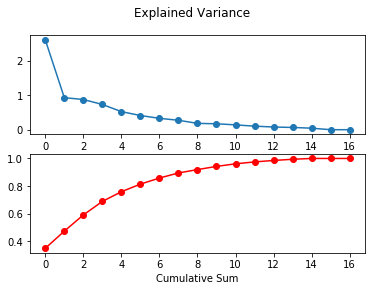

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=df_std.shape[1], whiten=False)
pca.fit(df_std.iloc[:,0:df_std.shape[1]])

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.align_ylabels()
fig.suptitle('Explained Variance')
ax1.plot(pca.explained_variance_,'o-')
ax1.set_xlabel('Principal Component')
cmsm = np.cumsum(pca.explained_variance_)
ax2.plot(cmsm/cmsm[-1],'o-r')
ax2.set_xlabel('Cumulative Sum')

pcs = pca.transform(df_std.iloc[:,0:df_std.shape[1]])
#plt.savefig('PCA.png')

In [10]:
columns = ['PCA '+str(i) for i in range(8)]
x = pd.DataFrame(data = pcs[:, :8], columns = columns)
x.head()

,PCA 0,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7
0,-0.116230,-0.992147,-1.413089,0.613121,-1.962330,0.100667,1.426347,-0.949933
1,2.581850,0.687968,0.536715,0.612676,-0.026115,-0.653451,0.688337,0.432439
2,-0.451967,-0.785719,0.326137,0.564238,-0.092828,-0.514449,-0.241106,0.304595
3,-2.584373,1.043019,0.551334,-0.145020,-1.103061,-0.787798,-0.223769,-0.105492
4,1.714939,-1.285239,1.243215,1.732959,0.420145,-0.006603,-1.057121,-0.113442


**We plot out the first two components by PCA**

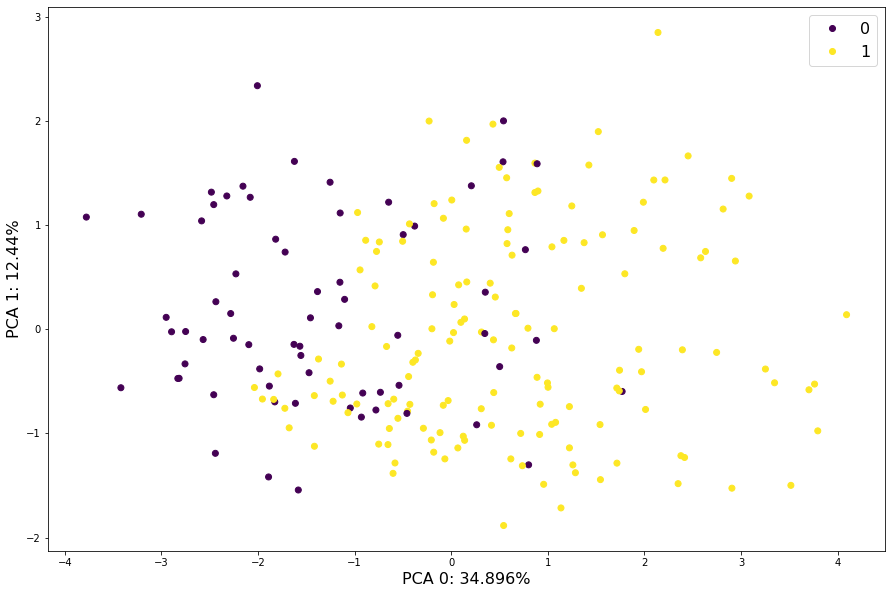

In [11]:
fig, ax = plt.subplots(figsize=(15,10));
scatter = ax.scatter(pcs[:,0], pcs[:,1], c=y)
ax.legend(handles=scatter.legend_elements()[0], labels=list(set(y)), fontsize=16)
ax.set_xlabel('PCA 0: '+str(round(100*pca.explained_variance_[0]/cmsm[-1],3))+'%', fontsize=16);
ax.set_ylabel('PCA 1: '+str(round(100*pca.explained_variance_[1]/cmsm[-1],3))+'%', fontsize=16);
#plt.savefig('first2PC.png')

<font size='5'> **Data After PCA**

In [12]:
x.head()

,PCA 0,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7
0,-0.116230,-0.992147,-1.413089,0.613121,-1.962330,0.100667,1.426347,-0.949933
1,2.581850,0.687968,0.536715,0.612676,-0.026115,-0.653451,0.688337,0.432439
2,-0.451967,-0.785719,0.326137,0.564238,-0.092828,-0.514449,-0.241106,0.304595
3,-2.584373,1.043019,0.551334,-0.145020,-1.103061,-0.787798,-0.223769,-0.105492
4,1.714939,-1.285239,1.243215,1.732959,0.420145,-0.006603,-1.057121,-0.113442


# K Means

Populating the interactive namespace from numpy and matplotlib


/Users/apple/.local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


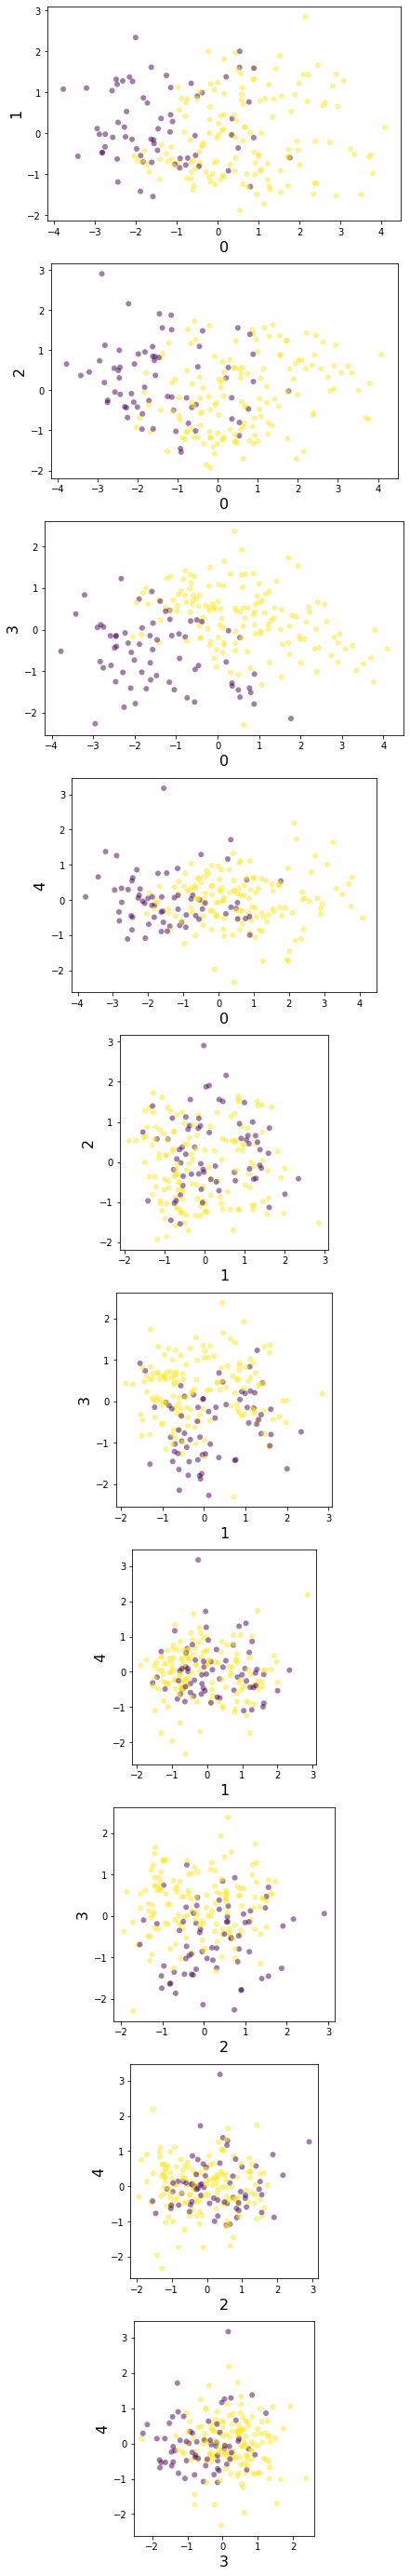

In [13]:
#choose first 5 components to do the clustering
%pylab inline
from sklearn.cluster import KMeans
figure(figsize=(50,50))
for i,m,n in [(1,0,1),(2,0,2),(3,0,3),(4,0,4),(5,1,2),(6,1,3),(7,1,4),(8,2,3),(9,2,4),(10,3,4)]:
    ax=subplot(10,1,i,aspect='equal');
    scatter(x.iloc[:,m],x.iloc[:,n], c=y,alpha=0.5, edgecolor='none');
    ax.set_xlabel(str(m), fontsize=16);
    ax.set_ylabel(str(n), fontsize=16);

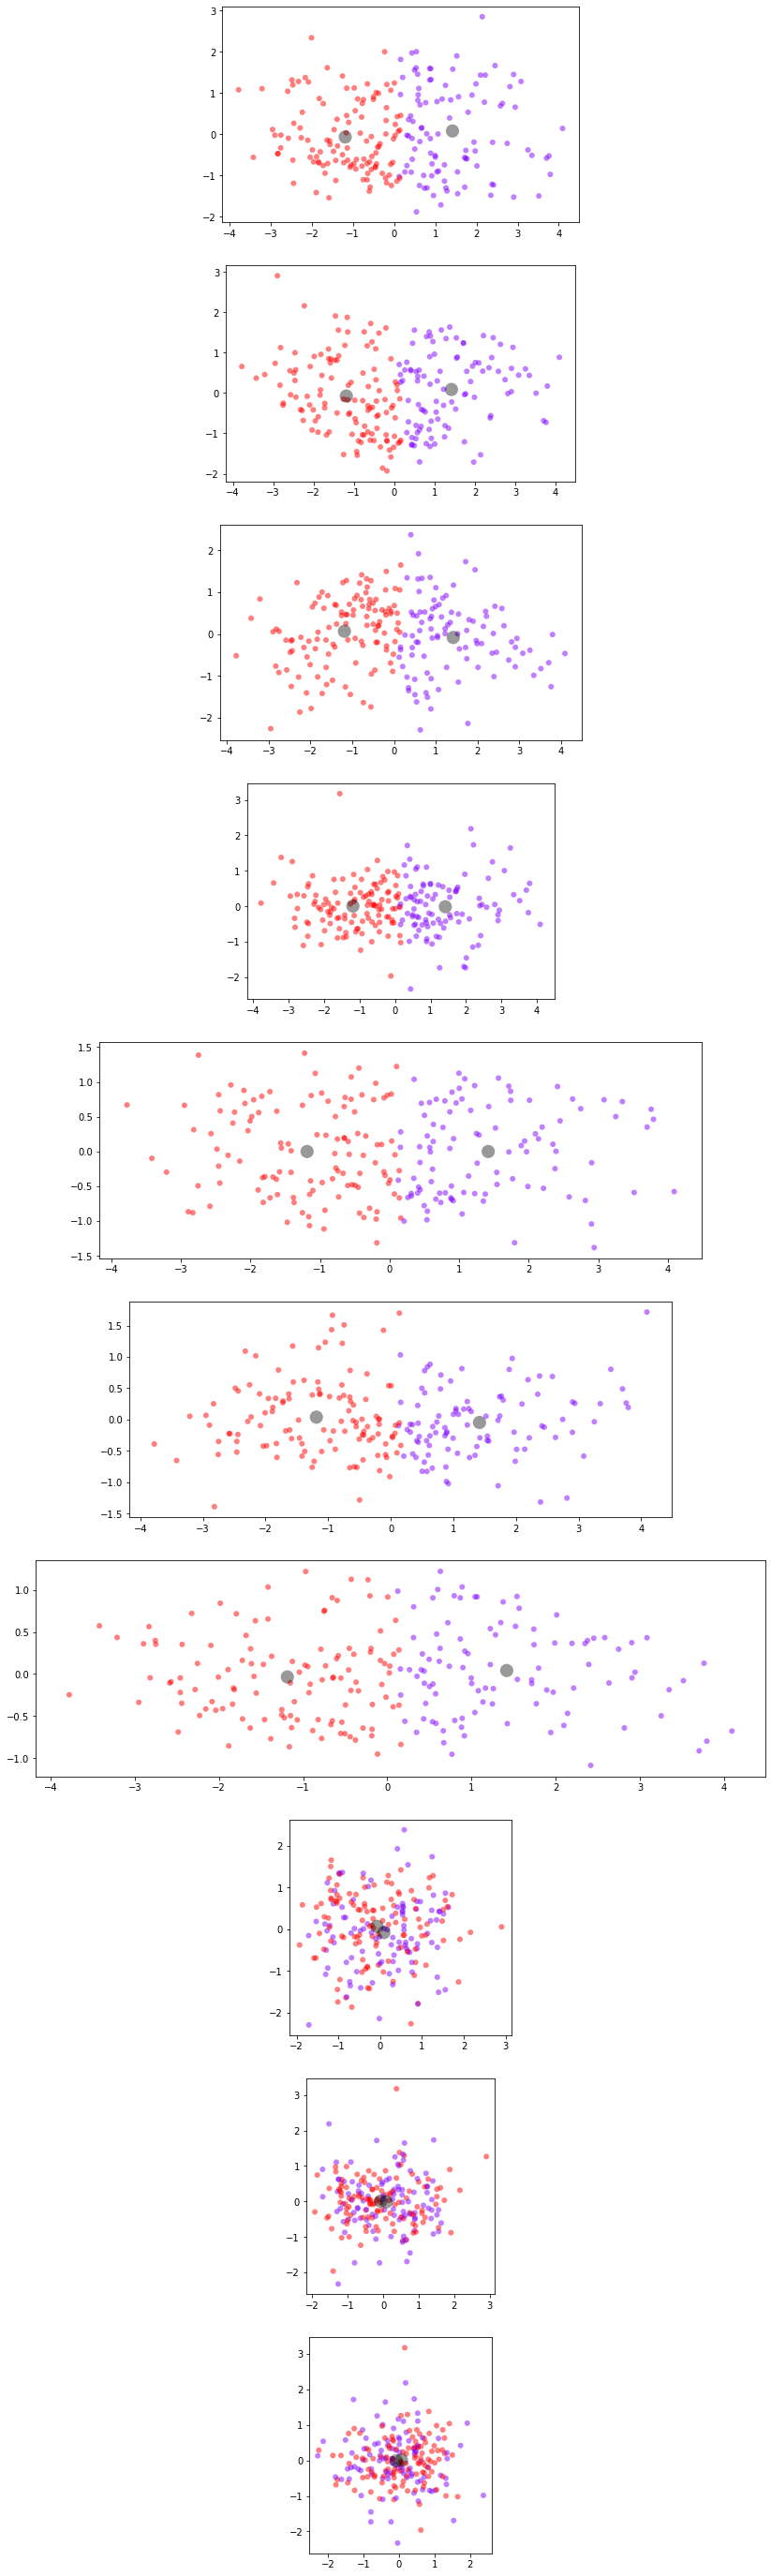

<Figure size 432x288 with 0 Axes>

In [14]:
X = x.iloc[:,0:8]
klist = []
ilist = []
for k in range(2,3):
    kmeans = KMeans(n_clusters=k, copy_x=False)
    kmeans.fit(X)
    klist.append(k)
    ilist.append(kmeans.inertia_) 
    if True:
        C, L = kmeans.cluster_centers_, kmeans.labels_
        figure(figsize=(50,50))
        for i,m,n in [(1,0,1),(2,0,2),(3,0,3),(4,0,4),(5,0,5),(6,0,6),(7,0,7),(8,2,3),(9,2,4),(10,3,4)]:
            ax=subplot(10,1,i,aspect='equal')
            scatter(X.iloc[:,m],X.iloc[:,n],c=L,cmap=cm.rainbow, alpha=0.5, edgecolor='none');
            scatter(C[:,m],C[:,n],c='k',marker='o',s=200,alpha=0.4,edgecolor='none');
figure(); 


if we want to have two clusters whitch are placed or not-placed,the data whitch has first component performed better.As we can see above plots, the first 7 plots have clear 2 clusters

**We plot out seven components by PCA using GaussianMixture and want to have 2 clusters(Placed and not placed)**

# Gaussian Mixture Model

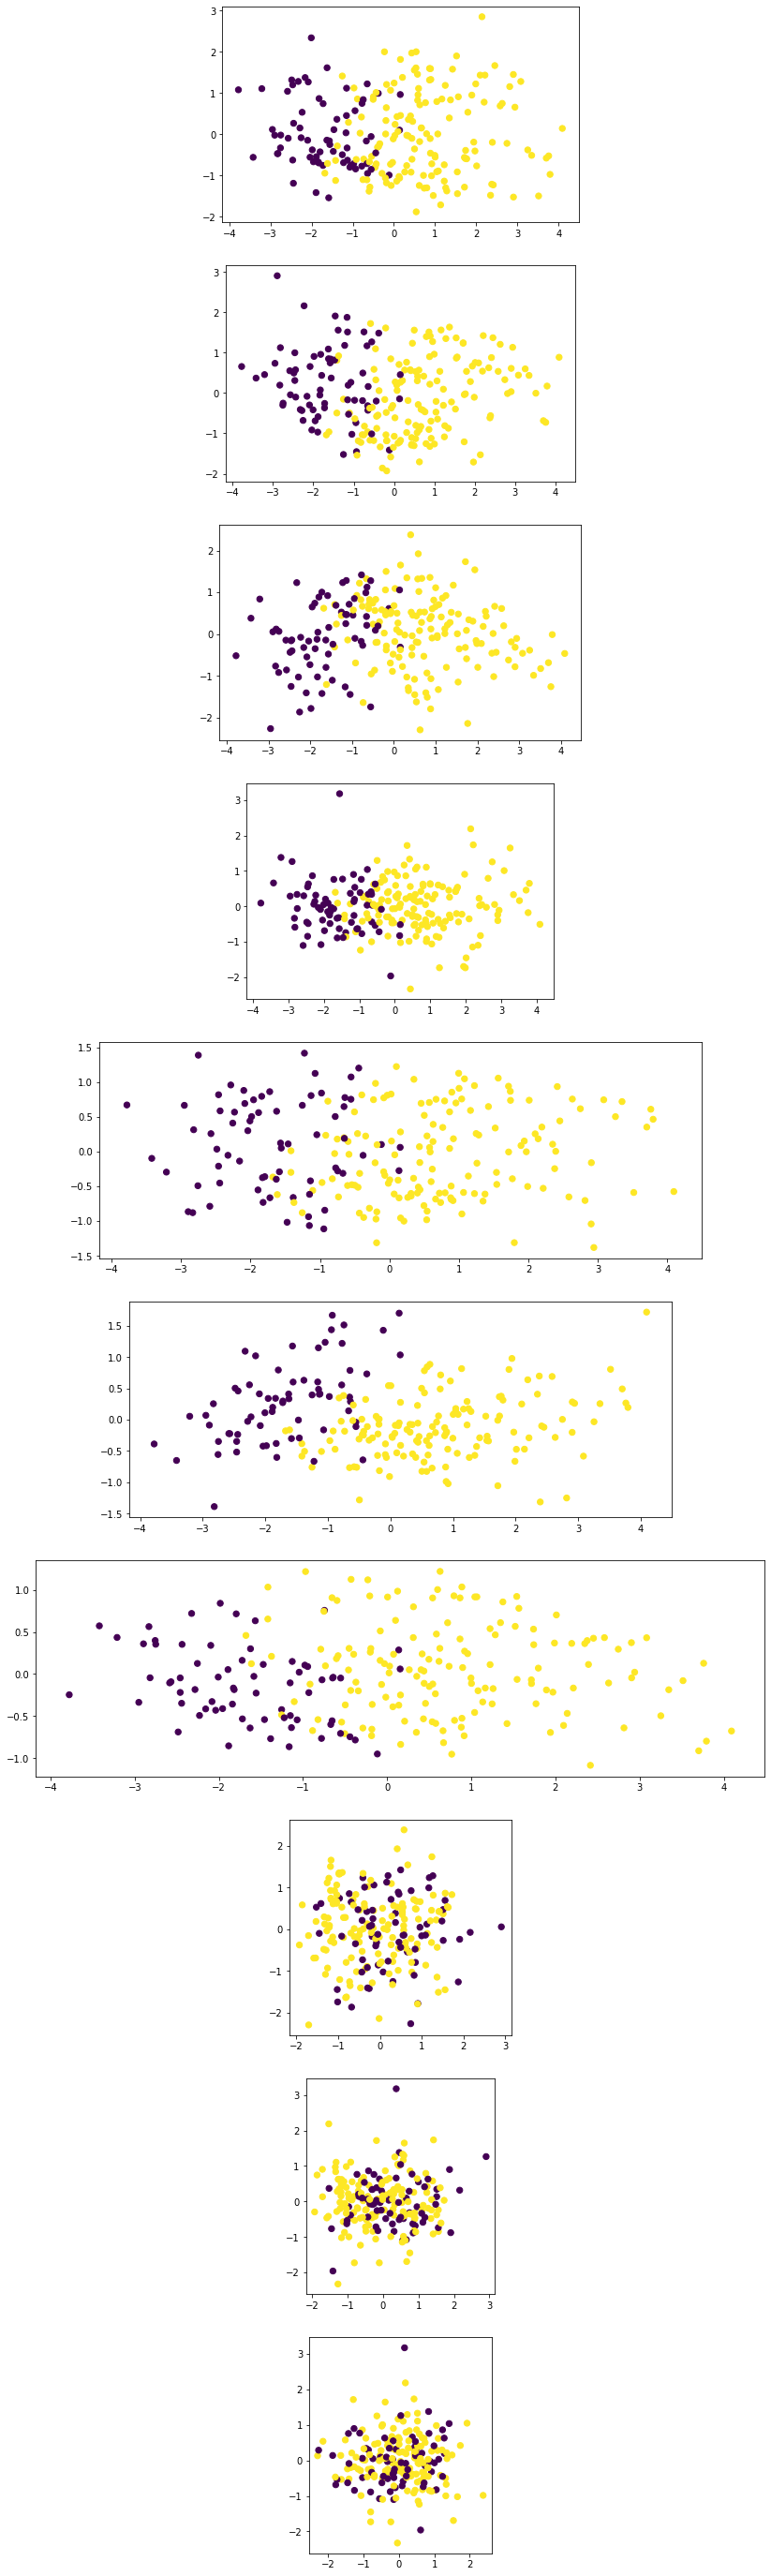

In [15]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(X)
labels = gmm.predict(X)
figure(figsize=(50,50))
for i,m,n in [(1,0,1),(2,0,2),(3,0,3),(4,0,4),(5,0,5),(6,0,6),(7,0,7),(8,2,3),(9,2,4),(10,3,4)]:
    ax=subplot(10,1,i,aspect='equal')
    plt.scatter(X.iloc[:, m], X.iloc[:, n], c=labels, s=40, cmap='viridis');


If we use GMM clustering it performs worse than Kmeans, we can see from the plots that they have more overlaps than Kmeans.

# K Fold

In [16]:
from sklearn.model_selection import cross_val_score, KFold 
kf = KFold(n_splits=4, random_state = 42)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Gaussian Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
start = time.clock()

gnb = GaussianNB()
gnb.fit(x,y)
s_gnb = cross_val_score(gnb, x, y, cv=kf)
end = time.clock()
gnb_time = end-start
print("\n Statistics of Guassian Naive Baysian is: ")
print(pd.DataFrame(s_gnb, columns = ["Gaussian Naive Baysian"]).describe())


 Statistics of Guassian Naive Baysian is: 
       Gaussian Naive Baysian
count                4.000000
mean                 0.892732
std                  0.070820
min                  0.830189
25%                  0.832547
50%                  0.888889
75%                  0.949074
max                  0.962963


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


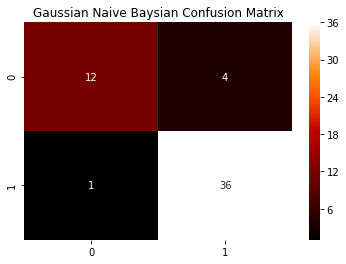

In [18]:
from sklearn.metrics import confusion_matrix
gnb_conf_matrix = []
TT = []
TF = []
FT = []
FF = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb.fit(x_train, y_train)
    gnb_conf_matrix.append(confusion_matrix(y_test, gnb.predict(x_test)))
    
for i in range(4):
    TT.append(gnb_conf_matrix[i][0,0])
    TF.append(gnb_conf_matrix[i][0,1])
    FT.append(gnb_conf_matrix[i][1,0])
    FF.append(gnb_conf_matrix[i][1,1])
ax = plt.axes()
sns.heatmap(np.array([[int(np.mean(TT)),int(np.mean(TF))],[int(np.mean(FT)),int(np.mean(FF))]]), annot=True, cmap="gist_heat")
ax.set_title("Gaussian Naive Baysian Confusion Matrix")
plt.show()

# LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import time
start = time.clock()
lda = LDA()
lda.fit(x,y)
s_lda = cross_val_score(lda, x, y, cv=kf)
end = time.clock()
lda_time = end-start
print("\n Statistics of LDA is: ")
print(pd.DataFrame(s_lda, columns = ['LDA']).describe())



 Statistics of LDA is: 
            LDA
count  4.000000
mean   0.916143
std    0.032691
min    0.886792
25%    0.888365
50%    0.916667
75%    0.944444
max    0.944444


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


**LDA Confusion Matrix**

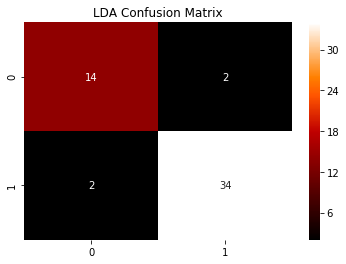

In [20]:
from sklearn.metrics import confusion_matrix
lda_conf_matrix = []
TT = []
TF = []
FT = []
FF = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lda.fit(x_train, y_train)
    lda_conf_matrix.append(confusion_matrix(y_test, lda.predict(x_test)))
    
for i in range(4):
    TT.append(lda_conf_matrix[i][0,0])
    TF.append(lda_conf_matrix[i][0,1])
    FT.append(lda_conf_matrix[i][1,0])
    FF.append(lda_conf_matrix[i][1,1])
ax = plt.axes()
sns.heatmap(np.array([[int(np.mean(TT)),int(np.mean(TF))],[int(np.mean(FT)),int(np.mean(FF))]]), annot=True, cmap="gist_heat")
ax.set_title("LDA Confusion Matrix")
plt.show()
#plt.savefig('lda_conf.png')

# QDA

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
start = time.clock()
qda = QDA()
qda.fit(x,y)
s_qda = cross_val_score(qda, x, y, cv=kf)
end = time.clock()
qda_time = end-start

print("\n Statistics of QDA is: ")
print(pd.DataFrame(s_qda, columns = ['QDA']).describe())

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  



 Statistics of QDA is: 
            QDA
count  4.000000
mean   0.888103
std    0.041465
min    0.830189
25%    0.874214
50%    0.898148
75%    0.912037
max    0.925926


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


**QDA Confusion Matrix**

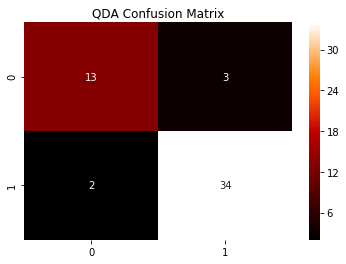

In [22]:
qda_conf_matrix = []
TT = []
TF = []
FT = []
FF = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    qda.fit(x_train, y_train)
    qda_conf_matrix.append(confusion_matrix(y_test, qda.predict(x_test)))
for i in range(4):
    TT.append(qda_conf_matrix[i][0,0])
    TF.append(qda_conf_matrix[i][0,1])
    FT.append(qda_conf_matrix[i][1,0])
    FF.append(qda_conf_matrix[i][1,1])
ax = plt.axes()
sns.heatmap(np.array([[int(np.mean(TT)),int(np.mean(TF))],[int(np.mean(FT)),int(np.mean(FF))]]), annot=True, cmap="gist_heat")
ax.set_title("QDA Confusion Matrix")
plt.show()
#plt.savefig('qda_conf.png')

# SVM

In [23]:
from sklearn import svm
start = time.clock()

SVM = svm.SVC(kernel='linear', C=1000)
SVM.fit(x,y)
s_svm = cross_val_score(SVM, x, y, cv=kf)
end = time.clock()
svm_time = end-start
print("\n Statistics of QDA is: ")
print(pd.DataFrame(s_svm, columns = ['SVM Linear']).describe())

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  



 Statistics of QDA is: 
       SVM Linear
count    4.000000
mean     0.920772
std      0.038780
min      0.886792
25%      0.888365
50%      0.916667
75%      0.949074
max      0.962963


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


**SVM Confusion Matrix**

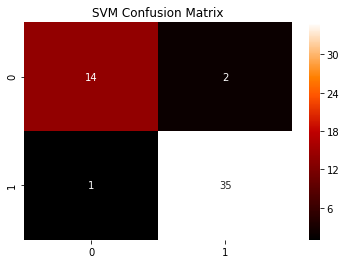

In [24]:
svm_conf_matrix = []
TT = []
TF = []
FT = []
FF = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    SVM = svm.SVC(kernel='linear', C=1000)
    SVM.fit(x_train, y_train)
    svm_conf_matrix.append(confusion_matrix(y_test, SVM.predict(x_test)))
for i in range(4):
    TT.append(svm_conf_matrix[i][0,0])
    TF.append(svm_conf_matrix[i][0,1])
    FT.append(svm_conf_matrix[i][1,0])
    FF.append(svm_conf_matrix[i][1,1])
    
ax = plt.axes()
sns.heatmap(np.array([[int(np.mean(TT)),int(np.mean(TF))],[int(np.mean(FT)),int(np.mean(FF))]]), annot=True, cmap="gist_heat")
ax.set_title("SVM Confusion Matrix")
plt.show()
#plt.savefig('svm_conf.png')

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
start = time.clock()
logistic = LogisticRegression(C=1e5)
logistic.fit(x,y)
s_logistic = cross_val_score(logistic, x, y, cv=kf)
end = time.clock()
logistic_time = end-start
print("\n Statistics of Logistic Regression is: ")
print(pd.DataFrame(s_logistic, columns = ['Logistic Regression']).describe())



 Statistics of Logistic Regression is: 
       Logistic Regression
count             4.000000
mean              0.925402
std               0.034583
min               0.886792
25%               0.902254
50%               0.925926
75%               0.949074
max               0.962963


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


**Logistic Regression Confusion Matrix**

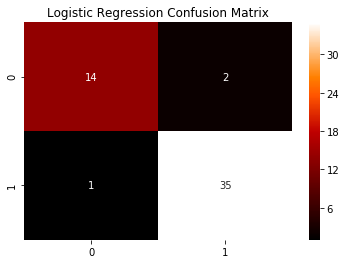

In [26]:
logistic_conf_matrix = []
TT = []
TF = []
FT = []
FF = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logistic = LogisticRegression(C=1e5)
    logistic.fit(x_train, y_train)
    logistic_conf_matrix.append(confusion_matrix(y_test, logistic.predict(x_test)))
for i in range(4):
    TT.append(logistic_conf_matrix[i][0,0])
    TF.append(logistic_conf_matrix[i][0,1])
    FT.append(logistic_conf_matrix[i][1,0])
    FF.append(logistic_conf_matrix[i][1,1])
    
ax = plt.axes()
sns.heatmap(np.array([[int(np.mean(TT)),int(np.mean(TF))],[int(np.mean(FT)),int(np.mean(FF))]]), annot=True, cmap="gist_heat")
ax.set_title("Logistic Regression Confusion Matrix")
plt.show()
#plt.savefig('logit_conf.png')

# KNN

1NN 4 folds cv  [0.85185185 0.92592593 0.92592593 0.83018868]
2NN 4 folds cv  [0.88888889 0.90740741 0.90740741 0.8490566 ]
3NN 4 folds cv  [0.88888889 0.92592593 0.90740741 0.9245283 ]
4NN 4 folds cv  [0.90740741 0.88888889 0.94444444 0.86792453]
5NN 4 folds cv  [0.87037037 0.90740741 0.90740741 0.86792453]
6NN 4 folds cv  [0.88888889 0.87037037 0.90740741 0.86792453]
7NN 4 folds cv  [0.87037037 0.87037037 0.90740741 0.81132075]


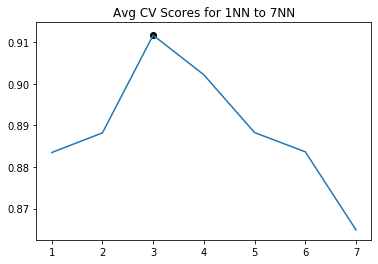

In [27]:
from sklearn import neighbors
index = []
cross_val_scores = []
for k in range(1,8):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=kf)
    print("%dNN 4 folds cv " %k,scores)
    index.append(k)
    cross_val_scores.append(np.mean(scores))
max_k = np.argmax(cross_val_scores)
plt.figure()
plt.title('Avg CV Scores for 1NN to 7NN')
plt.plot(index, cross_val_scores);
plt.scatter(max_k+1, np.max(cross_val_scores), c='k');
plt.show()
#plt.savefig('3nn.png')

**It looks like 3-NN has the best average cv score under 4 folds CV**

In [28]:
start = time.clock()
knn = neighbors.KNeighborsClassifier(n_neighbors=max_k+1)
knn.fit(x,y)
s_knn = cross_val_score(knn, x, y, cv=kf)
end = time.clock()
knn_time = end-start
print("\n Statistics of KNN is: ")
print(pd.DataFrame(s_knn, columns = [str(max_k+1)+'NN']).describe())


 Statistics of KNN is: 
            3NN
count  4.000000
mean   0.911688
std    0.017375
min    0.888889
25%    0.902778
50%    0.915968
75%    0.924878
max    0.925926


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


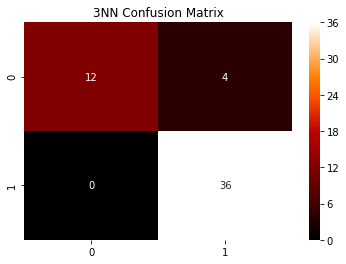

In [29]:
knn_conf_matrix = []
TT = []
TF = []
FT = []
FF = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(x_train, y_train)
    knn_conf_matrix.append(confusion_matrix(y_test, knn.predict(x_test)))
for i in range(4):
    TT.append(knn_conf_matrix[i][0,0])
    TF.append(knn_conf_matrix[i][0,1])
    FT.append(knn_conf_matrix[i][1,0])
    FF.append(knn_conf_matrix[i][1,1])
    
ax = plt.axes()
sns.heatmap(np.array([[int(np.mean(TT)),int(np.mean(TF))],[int(np.mean(FT)),int(np.mean(FF))]]), annot=True, cmap="gist_heat")
ax.set_title(str(max_k+1)+"NN Confusion Matrix")
plt.show()


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
start = time.clock()
rf = RandomForestClassifier(n_estimators=50, max_depth=2)
rf.fit(x,y)
s_rf = cross_val_score(rf, x, y, cv=kf)
end = time.clock()
rf_time = end-start
print("\n Statistics of Random Forest is: ")
print(pd.DataFrame(s_rf, columns = ['RF']).describe())

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  



 Statistics of Random Forest is: 
             RF
count  4.000000
mean   0.818047
std    0.095982
min    0.698113
25%    0.771751
50%    0.824074
75%    0.870370
max    0.925926


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


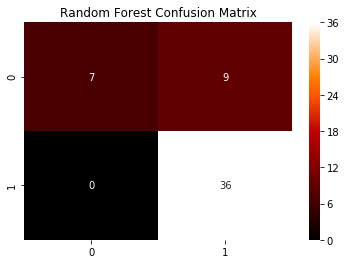

In [31]:
rf_conf_matrix = []
TT = []
TF = []
FT = []
FF = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(x_train, y_train)
    rf_conf_matrix.append(confusion_matrix(y_test, rf.predict(x_test)))
for i in range(4):
    TT.append(rf_conf_matrix[i][0,0])
    TF.append(rf_conf_matrix[i][0,1])
    FT.append(rf_conf_matrix[i][1,0])
    FF.append(rf_conf_matrix[i][1,1])
    
ax = plt.axes()
sns.heatmap(np.array([[int(np.mean(TT)),int(np.mean(TF))],[int(np.mean(FT)),int(np.mean(FF))]]), annot=True, cmap="gist_heat")
ax.set_title("Random Forest Confusion Matrix")
plt.show()

# Voting Ensemble
**Inspired by the M Competition**

In [39]:
from sklearn.ensemble import VotingClassifier
start = time.clock()
vote = VotingClassifier(
    estimators=[('LDA', lda), ('QDA',qda), ('SVM',SVM), 
                ('LogisticRegression', logistic), ('5NN',knn),('Random Forest',rf),('GNB', gnb)])

s_ensemble = cross_val_score(vote, x, y, cv=kf)
end = time.clock()
vote_time = end-start
print("\n Statistics of Voting is: ")
print(pd.DataFrame(s_ensemble, columns = ['Voting Ensemble']).describe())

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  



 Statistics of Voting is: 
       Voting Ensemble
count         4.000000
mean          0.911513
std           0.028374
min           0.886792
25%           0.888365
50%           0.907407
75%           0.930556
max           0.944444


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


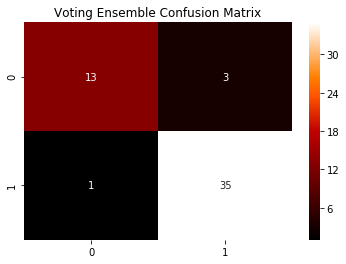

In [40]:
ensemble_conf_matrix = []
TT = []
TF = []
FT = []
FF = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]    
    vote.fit(x_train, y_train)
    ensemble_conf_matrix.append(confusion_matrix(y_test, vote.predict(x_test)))
for i in range(4):
    TT.append(ensemble_conf_matrix[i][0,0])
    TF.append(ensemble_conf_matrix[i][0,1])
    FT.append(ensemble_conf_matrix[i][1,0])
    FF.append(ensemble_conf_matrix[i][1,1])
    
ax = plt.axes()
sns.heatmap(np.array([[int(np.mean(TT)),int(np.mean(TF))],[int(np.mean(FT)),int(np.mean(FF))]]), annot=True, cmap="gist_heat")
ax.set_title("Voting Ensemble Confusion Matrix")
plt.show()
#plt.savefig('ensemble_conf.png')

# Model Comparison

**Box plot**

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


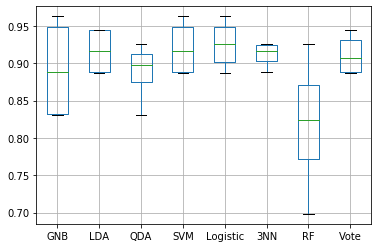

In [34]:
res = pd.DataFrame(pd.np.column_stack([s_gnb, s_lda,s_qda,s_svm, s_logistic, s_knn, s_rf, s_ensemble]), 
             columns=['GNB','LDA','QDA','SVM', 'Logistic', str(max_k+1)+'NN', 'RF','Vote']);
res.boxplot();
#plt.savefig('box.png')

**Compare mean of cv for different models**

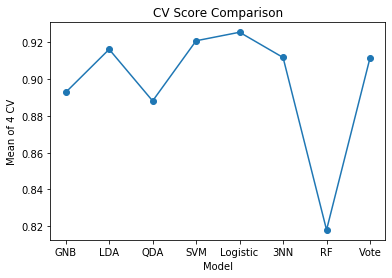

In [35]:
mean_list = [s_gnb.mean(),s_lda.mean(), s_qda.mean(), s_svm.mean(), s_logistic.mean(),s_knn.mean(), s_rf.mean(),s_ensemble.mean()]
maximizer = np.argmax(mean_list)
plt.plot(['GNB','LDA','QDA','SVM', 'Logistic', str(max_k+1)+'NN', 'RF','Vote'], mean_list,'o-');
plt.title('CV Score Comparison')
plt.ylabel('Mean of 4 CV')
plt.xlabel('Model')
plt.show()
#plt.savefig('compare_cv.png')

**Compare running time of different model under 4 folds**

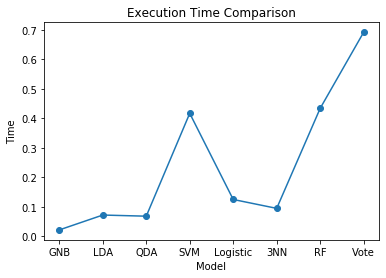

In [36]:
plt.plot(['GNB','LDA','QDA','SVM', 'Logistic', str(max_k+1)+'NN','RF', 'Vote'], 
         [gnb_time,lda_time, qda_time,svm_time, logistic_time, knn_time, rf_time,vote_time],'o-');
plt.title('Execution Time Comparison')
plt.ylabel('Time')
plt.xlabel('Model')
plt.show()
#plt.savefig('time.png')